This notebook is based on Andrew Ng's machine learning course on coursera

## 1. Linear regression with one variable

Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Import the dataset. Warning: Please put the 'ex1data1.txt' in the same file location as this jupyter notebook or you'd better specify your data file location.


In [214]:
path =  'ex1data1.txt' #specify your data file location
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()  #data overview

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


scatter plot

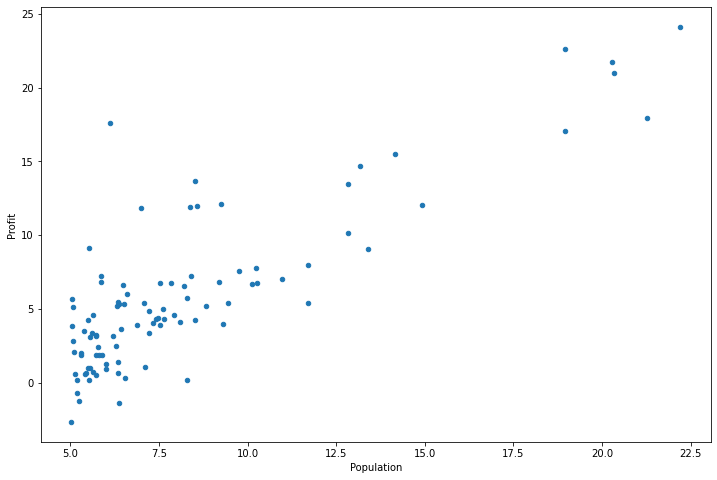

In [4]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))
plt.show()

Now let's use the gradient descent to achieve the linear regression model by minimizing the cost funcion $J(\theta)$

First, let's build the cost function with parameter $\theta$:
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
where \\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [215]:
def computeCost(X, y, theta):
    # your code here  (appro ~ 2 lines)
    #theta: 1*2
    #X: m*2 where m is the number of data points
    #y: m*1
    #cost: value
    res = X@np.transpose(theta)-y
    cost = res.T@res 
    
    return cost[0,0]/(len(y)*2)

Add a column with all ones for matrix computation.

In [216]:
data.insert(0, 'Ones', 1)

Preprocess the data to get training data and target variable

In [229]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [218]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [23]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


Transform X and y into matrix and Initialize theta.

In [230]:
X = np.matrix(X.values)
y = np.matrix(y.values)
# your code here  (appro ~ 1 lines)
# theta is an 1*2 matrix
theta = np.matrix(np.array([0.0,0.0]))

Make sure that the shapes are correct

In [232]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

Test the cost function given theta are all zeros.

In [222]:
computeCost(X, y, theta)

32.072733877455676

# 2.batch gradient decent
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$
where,
$$\frac{\partial{J}}{\partial{\theta}} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})*x^{(i)}$$ 


In [155]:
def gradientDescent(X, y, theta, alpha, iters):
    parameters = int(theta.shape[1])
    cost = np.zeros(iters)
    
    for i in range(iters):
        # your code here  (appro ~ 1 lines)
        res = X@np.transpose(theta)-y #m*1 matrix
        
        for j in range(parameters):
            # your code here  (appro ~ 2 lines)
            gradient =  alpha*res.T@X[:,j]/len(y)
            theta[0,j] = theta[0,j] - gradient[0,0]
            
        # your code here  (appro ~ 1 lines)    
        cost[i] = computeCost(X,y,theta)
        
    return theta, cost

Initialize the learning rate 'alpha' and the number of iterations 'iters'

In [156]:
alpha = 0.01
iters = 1000

Now let's use the gradient descent to get the parameter $\theta$ bases on the training data


In [157]:
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

array([[-3.24140214,  1.1272942 ]])

Now we can calculate the cost based on the estimated $\hat{\theta}$

In [158]:
computeCost(X, y, g)

4.515955503078914

Let's plot and see how how model fits the data

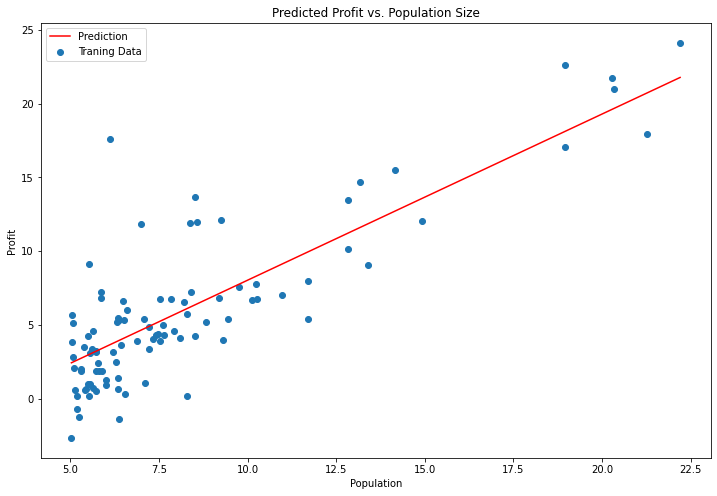

In [159]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

Let's plot and see the cost of each iteration during the training process

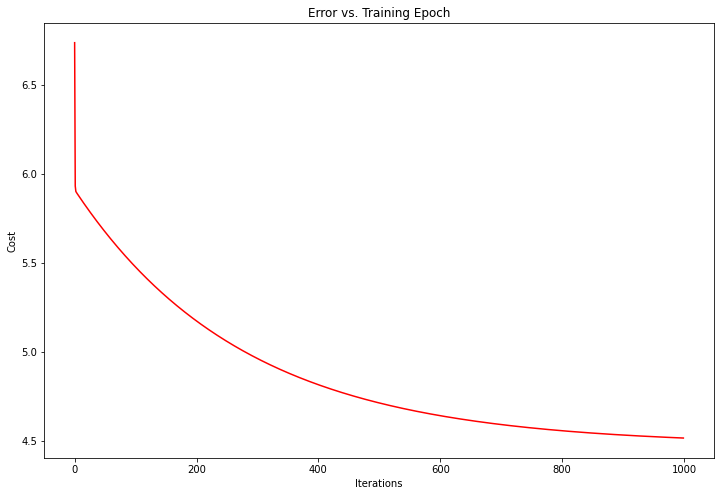

In [160]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

## 3. Linear regression with multiple variables

In [170]:
path =  'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


Preprocessing: feature normalization

In [171]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


Let's repeat the first and second part and train a new linear regression model based on the new dataset

In [226]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0.0,0.0,0.0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

Let's plot and see how the cost changes during the gradient descent training process

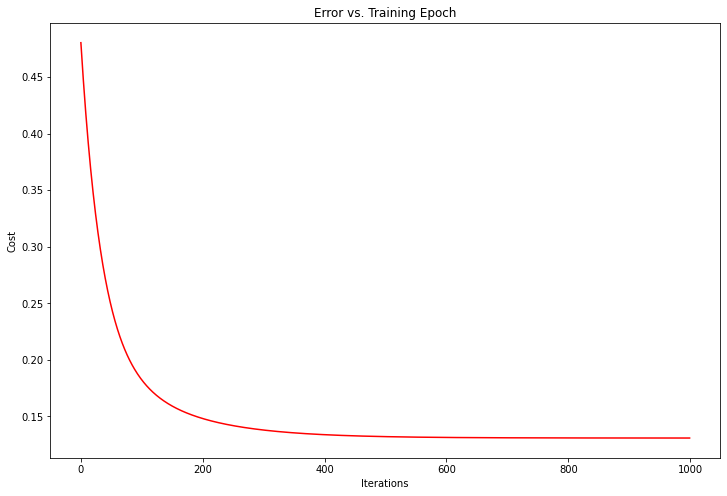

In [227]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

# 4. normal equation

Except for gradient descent, we can also calculate $\theta$ by solving the equation $\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$. 

Let's assume our feature matrix is X (including $x_{0}=1$) and our target variable vector is y. Therefore, $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$

Given that the time complexity of inverse computation is $O(n3)$, the normal equation is not very computational efficient when there is a large dataset especially when $n>10000$. Also, normal equation can only be applied to the linear regression model.


In [233]:
# Normal equation
def normalEqn(X, y):
    # your code here  (appro ~ 1 lines)
    theta = (X.T@X).I@X.T@y
    return theta

In [234]:
final_theta2=normalEqn(X, y)
final_theta2

matrix([[-3.89578088],
        [ 1.19303364]])

In [ ]:
#while the result of the gradien descent is: matrix([[-3.24140214,  1.1272942 ]])